# Основные понятия

Во всем дельнейшем курсе мы будем полагать, что рассматриваемые процессы удовлетворяют условию марковости, т.е являются Марковскими процессами. 

## Markov Desicion Process

Марковским процессом называется такой процесс для которого вероятность перехода в следующее состояние зависит __только__ от текущего состояния и не зависит от всех предыдущих и будущих состояний и не завистит от траектории попадания в текущее состояние.

Математически это выражается следующим образом.

$$\mathbb{P}[S_{t+1}|S_t,A_t]=\mathbb{P}[S_{t+1}|S_1,A_1, S_2, A_2, \dotsc, S_t,A_t]$$

Так же награда на текущем шаге зависит __только__ от текущего состояния. Сумма всех наград по всем _возможным_ шагам из текущего состояния равна 1.

$$\mathbb{P}[R_t|S_t,A_t]=\mathbb{P}[R_t|S_1,A_1, S_2, A_2, \dotsc, S_t,A_t]=1$$

Марковский процесс определяется следующими переменными: $\langle \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{P}_0, \mathcal{R}, \gamma \rangle$
- $\mathcal{S}$ - пространство состояний,
- $\mathcal{A}$ - пространство действий,
- $\mathcal{P}$ - функция, определяющая вероятность перехода из состояния $s$ при действии $a$ в состояние $s'$

$$\mathcal{P[s'|s, a]=\mathbb{P}[S_{t+1}=s'|S_t=s, A_t=a]}$$
- $\mathcal{P}_0$ - функция вероятности начального состояния,
- $\mathcal{R}$ - функция награды перехода из состояния $s$  при действии $a$
$$\mathcal{R}(s, a)=R_t \iff \mathbb{P}[R_t|S_t=s, A_t=a]=1$$
- $\gamma$ - коэффициент дисконтирования (обеспечивающий сходимость) 

## Постановка задачи

Максимизировать награду агента:
$$G=\sum_{t=0}^{\infty}\gamma^t R_t$$

__Политика__ 

Политикой называется отображение из пространства состояний в пространство действий
$$\pi(a|s): \mathcal{S} \mapsto \mathcal{A}$$
$$ \pi(a|s) \in [0, 1], a \in \mathcal{A}, s \in \mathcal{S}$$

Результатом действия политики на среду является траектория, которая определяет конечную награду агента.


$$\tau = \{S_0,A_0, S_1,A_1, \dotsc\}, G(\tau)=\sum_{t=0}^\infty {\gamma^t \mathcal{R}(S_t, A_t)}$$

<div class="alert alert-block alert-info">
<b>интуитивное объяснение "на пальцах":</b>
    
Пусть у нас есть лабиринт. Тогда множество клеток лабиринта - это множество состояний $\mathcal{S}$. В каждой клетке мы можем сделать несколько действий: пойти влево, вправо, вверх, вниз и остаться на месте - это пространство состояний $\mathcal{A}$. Для каждой клетки лабиринта задана вероятность каждого действия - это политика $\pi$.

Теперь мы можем построить траекторию прохождения лабиринта от любой начальной точки до любой конечной - это траектория $\tau$.

Поскольку в каждом состоянии мы можем выполнить несколько действий с различной вероятностью, то строя путь от начальной точки до конечной мы получим различные пути с различной наградой (в силу того что будем выбирать различные переходы с различными вероятностями). НО при большом количетве проходов (в силу центральной предельной теоремы) мы будем приближаться к некоторому среднему значению награды - это мат ожидание награды $\mathbb{E}_\pi[G]$ по траектории $\tau$ из состояния $s$ в силу политики $\pi$.</div>



__Задача обучения с подкреплением__

Максимизировать математическое ожидание награды по пространству траекторий при заданной политики:
$$\mathbb{E}_\pi[G]\to \left. \max \right|_\pi$$
т.е нам __нужно найти такую политику для которой мат ожидание награды будет максимальным__.

Выразим мат ожидание в явном виде для простоты. Вероятность получить определенную траекторию при заданной политике есть:
$$\mathbb{P}(\tau|\pi)=\mathcal{P}_0(S_0)\prod_{t=0}^\infty{\pi(A_t|S_t)\mathcal{P}(S_{t+1}|S_t,A_t)}$$ тогда, итоговое мат ожидание есть сумма по всем траекториям на вероятность получить данную траекторию при заданной политике:
$$\mathbb{E}[G] = \sum_\tau{G(\tau)\mathbb{P}(\tau|\pi)}$$

P.S. В случае бесконечного числа траекторий мы получаем интеграл: $$\int\limits_\tau{G(\tau)\mathbb{P}(\mathrm{d}\tau|\pi)}$$

таким образом задача обучения с подкреплением сводится к задаче конечномерной (или бесконечно мерной) оптимизации.

## Принцип динамического программирования

Если у нас есть некоторая траектория из состояния $S_0$ через состояние $S_1$ в состояние $S_F$ и эта траектория является оптимальной, то эта же траектория будет оптимальной для перехода из состояния $S_1$ в состояние $S_F$.

## $v$-функция (value-function)

$v$-функция определяет мат ожидание суммарной награды если мы будем действовать из состояния $s$ в силу политики $\pi$
$$v_\pi(s)=\mathbb{E}_\pi[G]$$

__Пример:__ Если у нас детерминированная среда и политика (т.е. из каждого состояния можно перейти __только в одно__ следующее состояние и политика определяет в какое, а среда определяет с какой наградой), то $v$-функция может быть представлена в явном виде и является суммарной наградой по выбранной траектории.

## Уравнение Беллмана для $v$-функции

Пусть у нас есть некоторая траектория $\tau$ и награда по этой траектории $G(\tau)$ $$\tau=(S_0,A_0, S_1,A_1, \dotsc , S_t,A_t),$$
$$G(\tau)=\sum_{t=0}^\infty{\gamma^t \mathcal{R}(S_t,A_t)}$$

и пусть есть траектория $\tilde{\tau}$ такая, что: 
$$\tilde{\tau}=(S_1,A_1, \dotsc , S_t,A_t),$$ 
$$G(\tilde{\tau})=\sum_{t=0}^\infty{\gamma^t \mathcal{R}(S_{t+1},A_{t+1})}$$

тогда награду по траектории $\tau$ можно представить в виде:

$$G(\tau)=\mathcal{R}(S_0, A_0) + \gamma \sum_{t=1}^\infty{\gamma^{t-1}\mathcal{R}(S_t,A_t)}=\mathcal{R}(S_0, A_0) + \gamma G(\tilde{\tau})$$

тогда учитывая, что из каждого состояния мы можем выполниить некоторое действие с определенной вероятностью $\pi(a|s)$ и перейти в одно из следующих состояний с наградой $\mathcal{R}(s'|s, a)$, то суммируя эти вероятности получим:

$$v_\pi(s)=\sum_a{\pi(a|s)\bigg(\mathcal{R}(s, a) + \gamma \sum_{s'}{\mathcal{R}(s'|s, a)v_{\pi}(s')}\bigg)}$$

что здесь написано: суммируем по траектории все награды для кадого действия из каждого состояния со значением $v$-функции для следующего шага.

Это рекурентное уравнение.

Раскроем сумму и введем обозначения:
$$v_\pi(s)=\sum_a{\pi(a|s)\mathcal{R}(s,a) + \gamma \sum_{s'}\sum_a\pi(a|s)\mathcal{P}(s'|s, a)v_\pi(s')}$$

$$\mathcal{R}_\pi(s)=\sum_a{\pi(a|s)\mathcal{R}(s,a)}, \text{     } \mathcal{P}_\pi(s',s)=\gamma \sum_{s'}\sum_a\pi(a|s)\mathcal{P}(s'|s, a)$$

тогда скрыв зависимость от $а$ уравнение Беллмана можно представить в следующем виде:
$$v_\pi(s)=\mathcal{R}_\pi(s) + \gamma \sum_{s'}{\mathcal{P}(s'|s, a)v_\pi(s')}$$

переходя для простоты записи к матричным обозначениям:

$v_\pi= 
\begin{pmatrix}
  v_\pi(s_1) \\
  \vdots  \\
  v_\pi(s_n)  
 \end{pmatrix}$, 
 $\mathcal{R}_\pi= 
 \begin{pmatrix}
  \mathcal{R}_\pi(s_1) \\
  \vdots  \\
  \mathcal{R}_\pi(s_n)  
 \end{pmatrix}$, $\mathcal{P}_\pi=  
\begin{pmatrix}
  \mathcal{P}_\pi(s_1, s_1) & \cdots & \mathcal{P}_\pi(s_1, s_n) \\
  \vdots  & \ddots & \vdots  \\
  \mathcal{P}_\pi(s_m, s_1) & \cdots & \mathcal{P}_\pi(s_m, s_n) 
 \end{pmatrix}$

получим следующую запись для уравнения Беллмана: $$v_\pi=\mathcal{R}_\pi + \gamma \mathcal{P}_\pi v_\pi$$

это обычная система линейных уравнений относительно $v_\pi$

Решение данной системы уравнений представимо в аналитическом виде: 
$$v_\pi=(E-\gamma \mathcal{P}_\pi)^{-1}\mathcal{P}_\pi$$

Решение данной системы всегда существует при $\gamma < 1$.

## $q$-функция (action-value function)

$q$-функция это мат ожидание награды агента в случае если мы из состояния $s$ действуем $a$ и далее движемся в силу политики $\pi$
$$q_\pi(s, a)=\mathbb{E}[G|S_0=s, A_0=a]$$
связь между функциями $v_\pi(s)$ и $q_\pi(s, a)$
$$v_\pi(s)=\sum_a{\pi (a|s) q_\pi (s, a)}$$

Если ранее мы предполагали что на первом шаге действие и состояние фиксированное $(S_0, A_0)$ то теперь для $q$-функции это является аргументом.

## Уравнение Беллмана для $q$-функции

$$q_\pi(s, a) = \mathcal{R}(s, a) + \gamma \sum_{s'}{\mathcal{P}(s'|s, a)}\sum_{a'}{\pi(a'|s')q_\pi(s', a')}$$

## Правило сравнения политики

Для политики введем частичный порядок: $$\pi' \geq \pi \iff v_{\pi'}(s) \geq v_\pi(s), \forall s \in S$$
Политика $\pi'$ больше или равна политике $\pi$ если $v$-функция от политики $\pi'$ больше или равна $v$-функции от политики $\pi$ для любого состояния $s$.

# Алгоритмы решения задачи

## Функция награды и функция действия изветны

В данном случае применяются алгоритмы __policy iteration__ и __value iteration__. 
Более подробно с ними можно познакомиться на бесплатном курсе ods.ai 

https://ods.ai/tracks/drlcourse22

### Policy iteration

Пусть у нас некоторым образом задана политика $\pi_0$. Тогда: 
1. __Шаг 1: policy evaluation__ - Оцениваем $\mathbb{E}_\pi[G]$ для этого решаем уравнение Беллмана относительно $v$ и по ней вычисляем $q$.
$$v(s)=\sum_a{\pi(a|s)\bigg( \mathcal{R}(s, a) + \gamma \sum_{s'}{\mathcal{P}(s'|s, a)v(s')} \bigg)}$$
2. __Шаг 2: policy improvement__ - улучшаем политику $\pi' \geq \pi$ так что $(\mathbb{E}_{\pi'}[G] \geq \mathbb{E}_\pi[G])$ и возвращаемся на шаг 1.

__Алгоритм__
- Устанавливаем начальное состояние $S_0$ и политику $\pi_0$
- Действуем $A_0 = \pi(S_0)$
- Получаем награду $R_0=(S_0, A_0)$ и переходим в состояние $S_1$
- Действуем $A_1 = \pi(S_1)$
- ...
- Действуем $A_{T-2} = \pi(S_{T-2})$
- Получаем награду $R_{T-2}=(S_{T-2}, A_{T-2})$ и переходим в состояние $S_{T-1}$
- Действуем $A_{T-1} = \pi(S_{T-1})$
- Получаем награду $R_{T-1}=(S_{T-1}, A_{T-1})$ и переходим в состояние $S_{F}$
- $\tau = \{S_0, A_0, S_1, A_1, \dotsc , S_T\}$, $\displaystyle G(\tau)=\sum_{t=0}^{T-1}{\gamma^t R_t}$
- "Улучшаем" траекторию
- Возвращаемся в начало

## Функция награды и функция действия неизветны

Будем рассматривать следующий Марковский процесс:

- $\mathcal{S}$ - пространство состояний __конечно размерности $n$ ($|\mathcal{S}| = n$)__ ,
- __существует__ единое для всех траекторий конечное состояние $S_F$,
- $\mathcal{A}$ - пространство действий __конечно размерности $m$ ($|\mathcal{A}| = m$)__ ,
- $\mathcal{P}$ - функция, определяющая вероятность перехода из состояния $s$ при действии $a$ в состояние $s'$ __неизвестна__

$$\mathcal{P[s'|s, a]=\mathbb{P}[S_{t+1}=s'|S_t=s, A_t=a]}$$
- $\mathcal{P}_0$ - функция вероятности начального состояния __неизвестна__,
- $\mathcal{R}$ - функция награды перехода из состояния $s$  при действии $a$ __неизвестна__
$$\mathcal{R}(s, a)=R_t \iff \mathbb{P}[R_t|S_t=s, A_t=a]=1$$
- $\gamma$ - коэффициент дисконтирования (обеспечивающий сходимость) 

1. __Шаг 1: policy evaluation__ - решаем уравнение Беллмана относительно $v$ и по ней вычисляем $q$.
$$v(s)=\sum_a{\pi(a|s)\bigg( {\color{red}{\mathcal{R}(s, a)}} + \gamma \sum_{s'}{{\color{red}{\mathcal{P}(s'|s, a)}}v(s')} \bigg)}$$ 
$$q(s, a)={\color{red}{\mathcal{R}(s, a)}} + \gamma \sum_{s'}{{\color{red}{\mathcal{P}(s'|s, a)}}v(s')}$$


В отличии от случая ___Policy iteration___ мы не знаем функцию  ${\color{red}{\mathcal{R}(s, a)}}$ и ${\color{red}{\mathcal{P}(s'|s, a)}}$

### Политика и среда детерминирована

- Устанавливаем начальное состояние $S_0$ и политику $\pi_0$
- Действуем $A_0 = \pi(S_0)$
- Получаем награду $R_0=(S_0, A_0)$ и переходим в состояние $S_1$
- Действуем $A_1 = \pi(S_1)$
- ...
- Действуем $A_{T-2} = \pi(S_{T-2})$
- Получаем награду $R_{T-2}=(S_{T-2}, A_{T-2})$ и переходим в состояние $S_{T-1}$
- Действуем $A_{T-1} = \pi(S_{T-1})$
- Получаем награду $R_{T-1}=(S_{T-1}, A_{T-1})$ и переходим в состояние $S_{F}$
- $\tau = \{S_0, A_0, S_1, A_1, \dotsc , S_T\}$, $\displaystyle G(\tau)=\sum_{t=0}^{T-1}{\gamma^t R_t}$

Для реализации алгоритма нам необходимо вычислить функцию $q(s, a)$:

- Будем искать функцию $q(s, a)$ вдоль реализованой траектории. Тогда функция $q(S_0, A_0) = G(\tau)$, т.е в силу определения функции $q$ - суммарная награда по траектории $\tau$.

- Тогда функция $q$ на последнем шаге равна: $q_\pi(S_{T-1}, A_{T-1}) = R_{T-1} = G_{T-1}$

- Вспоминая принцип динамического программирования, функция $q$ на шаге $T-2$ будет равна: $q_\pi(S_{T-2}, A_{T-2}) = R_{T-2} + \gamma R_{T-1} = G_{T-2}$

- Тогда награда на $k$-м шаге с конца будет: $\displaystyle G_k(\tau)=\sum_{t=k}^{T-1}{\gamma^t R_t} = G_{T-k}$

- Тогда с учетом введенных терминов:  
$\begin{cases}
    q_\pi(S_0, A_0) = G_0\\
    q_\pi(S_1, A_1) = G_1\\
    \dotsc\\
    q_\pi(S_{T-2}, A_{T-2}) = G_{T-2}\\
    q_\pi(S_{T-1}, A_{T-1}) = G_{T-1}
  \end{cases}$
  
- Тем самым мы нашли функцию $q$ вдоль реализовавшейся траектории $\pi$

### Политика и среда стохастическая

- Устанавливаем политику $\pi(a|s)$ и матрицы $W(s, a)$ и $N(s, a)$. $W$ - суммирует награды, $N$ - считает сколько раз оказались в действии $a$ с шага $s$. Это просто усреднение наград по траектории, для получения мат ожидания итоговой награды.
- Устанавливаем начальное состояние $S_0$
- Действуем $A_0 = \pi(\cdot|S_0)$ <br> ${\color{blue}{W(S_0, A_0) \gets W(S_0, A_0) + G_0}}$,<br> 
${\color{blue}{N(S_0, A_0) \gets N(S_0, A_0) +1}}$, <br>
${\color{blue}{Q(S_0, A_0) \gets \frac{W(S_0, A_0)}{N(S_0, A_0)}}}$
- Получаем награду $R_0=(S_0, A_0)$ и переходим в состояние $S_1$
- Действуем $A_1 = \pi(\cdot|S_1)$ <br> ${\color{blue}{W(S_1, A_1) \gets W(S_1, A_1) + G_1}}$, <br>
${\color{blue}{N(S_1, A_1) \gets N(S_1, A_1) +1}}$, <br>
${\color{blue}{Q(S_1, A_1) \gets \frac{W(S_1, A_1)}{N(S_1, A_1)}}}$
- ...
- Действуем $A_{T-1} = \pi(\cdot|S_{T-1})$ <br> ${\color{blue}{W(S_{T-1}, A_{T-1}) \gets W(S_{T-1}, A_{T-1}) + G_{T-1}}}$, <br>
${\color{blue}{N(S_{T-1}, A_{T-1}) \gets N(S_{T-1}, A_{T-1}) +1}}$, <br>
${\color{blue}{Q(S_{T-1}, A_{T-1}) \gets \frac{W(S_{T-1}, A_{T-1})}{N(S_{T-1}, A_{T-1})}}}$
- Получаем награду $R_{T-1}=(S_{T-1}, A_{T-1})$ и переходим в состояние $S_{F}$
- $\tau = \{S_1, A_1, S_1, A_1, \dotsc , S_T\}$, $\displaystyle G(\tau)=\sum_{t=1}^{T-1}{\gamma^t R_t}$

При достаточно большом количестве повторений мы считаем что эта средняя награда сходится к мат ожиданию.
$$q_\pi(s, a) = \mathbb{E}[G|S_0=s, A_0=a) \approx Q(s, a)$$

Функция $Q$ представляет собой простое среднее. Вспомним рекурентную формулу для простого среднего: $\displaystyle Q_N=\frac{1}{N}\sum_{i=1}^N{w_i}$ 
$$Q_{N+1}=\frac{1}{N+1}\sum_{i=1}^{N+1}{w_i}=\frac{1}{N+1}\bigg( \sum_{i=1}^N{w_i} + w_{N+1} \bigg) = \frac{1}{N+1}\big( NQ_N + w_{N+1} \big) = \\ Q_N + \frac{1}{N+1}\big( w_{N+1} - Q_N \big)$$

Тогда можем определить функцию $Q$ на шаге $i$: 
$$Q(S_i, A_i) \gets Q(S_i, A_i) + \frac{1}{N(S_i, A_i)+1}(G_i - Q(S_i, A_i))$$

## Monte-Carlo policy evaluation

1. Пусть у нас задана некоторая политика $\pi$
2. Инициализируем массивы $Q(s, a) = 0$ и $N(s, a) = 0$
3. Для каждого $k \in \overline{1, K}$, где $K$ - количество траекторий. <br> 
    Согласно политики $\pi$ получаем траекторию $\tau=(S_0, S_1, \dotsc , S_T)$, и награду $R_\tau=(R_0, R_1, \dotsc, R_{T-1})$ и вычисляем $G_\tau=(G_0, G_1, \dotsc, G_{T-1})$
4. Движемся по траектории и для каждого шага $t$ по ней переопределяем $Q$ и $N$: <br>
$\displaystyle Q(S_t, A_t) \gets Q(S_t,A_t) + \frac{1}{N(S_t, A_t)+1}(G_t - Q(S_t, A_t))$, <br> $N(S_t, A_t)\gets N(S_t, A_t) + 1$
5. В случае, если $K$ достаточно велико $(K \gg 1)$ считаем что $\lim\limits_{k \to \infty} Q(s, a) \to q_\pi(s, a)$, т.е мы получим $$Q(s, a) \approx q_\pi(s, a)$$

Тогда итоговый алгоритм решения задачи выглядит следующим образом:
1. __Policy evaluation__ <br>
$k \in \overline{1, K}$, $Q^k(s, a) \approx q_{\pi_k}(s, a)$ <br>
накапливаем знания о функции $Q^k(s, a)$ считая, что она сходится к $q_{\pi_k}(s, a)$
2. __Policy improvement__ <br>
Жадным образом улучшаем политику: 
$
\pi^{k+1}(a|s) =
  \begin{cases}
    1  & \quad \text{если }\left. a \in \text{ argmax} \right|_{a' \in \mathcal{A}} Q^k(s, a')\\
    0  & \quad \text{в остальных случаях}
  \end{cases}
$

<div class="alert alert-block alert-danger">
    <b>Такой алгоритм работать не будет!</b>
</div>
    



__Рассмотрим пример "Однорукий бандит"__
Есть автомат с двумя ручками, тогда: 
- действия: $(\gets), (\to)$
- награда: <br>$R(S_0, \gets) = 1$,<br> $R(S_0, \to) = 2$
- начальная политика: <br> $\pi^0(S_0, \gets)=1$, <br> $\pi^0(S_0, \to) = 0$

- Тогда:<br> $Q^0(S_0, \gets) = 1$, <br> $Q^0(S_0, \to) = 0$
- Поскольку мы улучшаем политику жадным образом, то $\pi^1 = \pi^0$ и $Q^1 = Q^0$

Таким образом мы из-за неудачной инициализации начальной политики никогда не попадем в состояние с максимальным выигрышем.

<div class="alert alert-block alert-info">
    <b>Решение данной проблемы</b> <br>
Решение данной проблемы связано с необходимостью добавить случайной вероятности перейти в состояние $\pi^k(s, a)=0$, т.е <br> 
</div>

__Policy improvement__ <br>
$\varepsilon$-жадная политика: 
$
\pi^{k+1}(a|s) =
  \begin{cases}
    1-\varepsilon + \frac{\varepsilon}{m}  & \quad \text{если }\left. a \in \text{ argmax} \right|_{a' \in \mathcal{A}} Q^k(s, a')\\
    \frac{\varepsilon}{m}  & \quad \text{в остальных случаях}
  \end{cases}
$ <br>
как правило $\varepsilon = \frac{1}{k}$, $m$ - количество вариантов выбора, на первом шаге полагают $\varepsilon=1$, что обеспечивает равновероятность всех действий.

## Temporal-Difference policy evaluation

Мы можем искать $q_\pi$ не просто накапливая статистику, а восопользоваться уравнением Беллмана и принципом динамического программирования.
Вспомним уравнение Беллмана для $q_\pi$:
$$q_\pi(s, a) = \mathcal{R}(s, a) + \gamma \sum_{s'}\mathcal{P}(s'|s, a)\sum_{a'}\pi(a'|s')q_{\pi'}(s'|a')$$ тогда учитывая вероятностный характер перехода из каждого состояния можно представить $q_\pi$ в следующем виде:
$$q_\pi(s, a)=\mathbb{E}_\pi[R_t + \gamma q_\pi(S_{t+1}, A_{t+1}|S_t=s, A_t=a)]$$
Все суммы у нас ушли в мат ожидание. 

Тогда если мы при переходе из состояния $S_t$ и действия $A_t$ по выбранной траектории $\pi$ получаем награду $R_t$ и переходим в состояние $S_{t+1}$, то проделав это многократно и усредним результат мы и получим искомое мат ожидание по выбранной траектории.  

Тогда мы можем итерационно искать решение уравнения Беллмана сдвигая текущее значение функции $Q(S_t, A_t)$ в сторону невязки правых и левых частей уравнения Беллмана:
$$Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha\big(R_t + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \big)$$
$\alpha$ в данном случае имеет смысл learning rate.

__Алгоритм:__
1. Выбираем политику $\pi$ и инициализируем $Q(S, A)=0, \varepsilon=1$
2. Для каждого $k \in \overline{1, K}, K \gg 1$ выполняем: в соотвествии с выбранной политикой $\pi = \varepsilon - greedy(Q)$ двигаемся по траектории $\tau = (S_0, A_0, S_1, A_1, \dotsc, S_T)$ получаем награду $R_\tau = (R_0, R_1, \dotsc, R_{T-1})$
3. Для каждого $t \in \overline{0, T-1}$ обновляем функцию $Q(S, A)$: 
$$Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha\big(R_t + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \big)$$
и обновляем $\varepsilon=\frac{1}{k}$, 
до тех пор пока она не стабилизируется. Это и будет искомое приближенное значение функции $Q(s, a) \approx q_\pi(s, a)$, т.е искомое решение уравнения Беллмана.

## Пример:

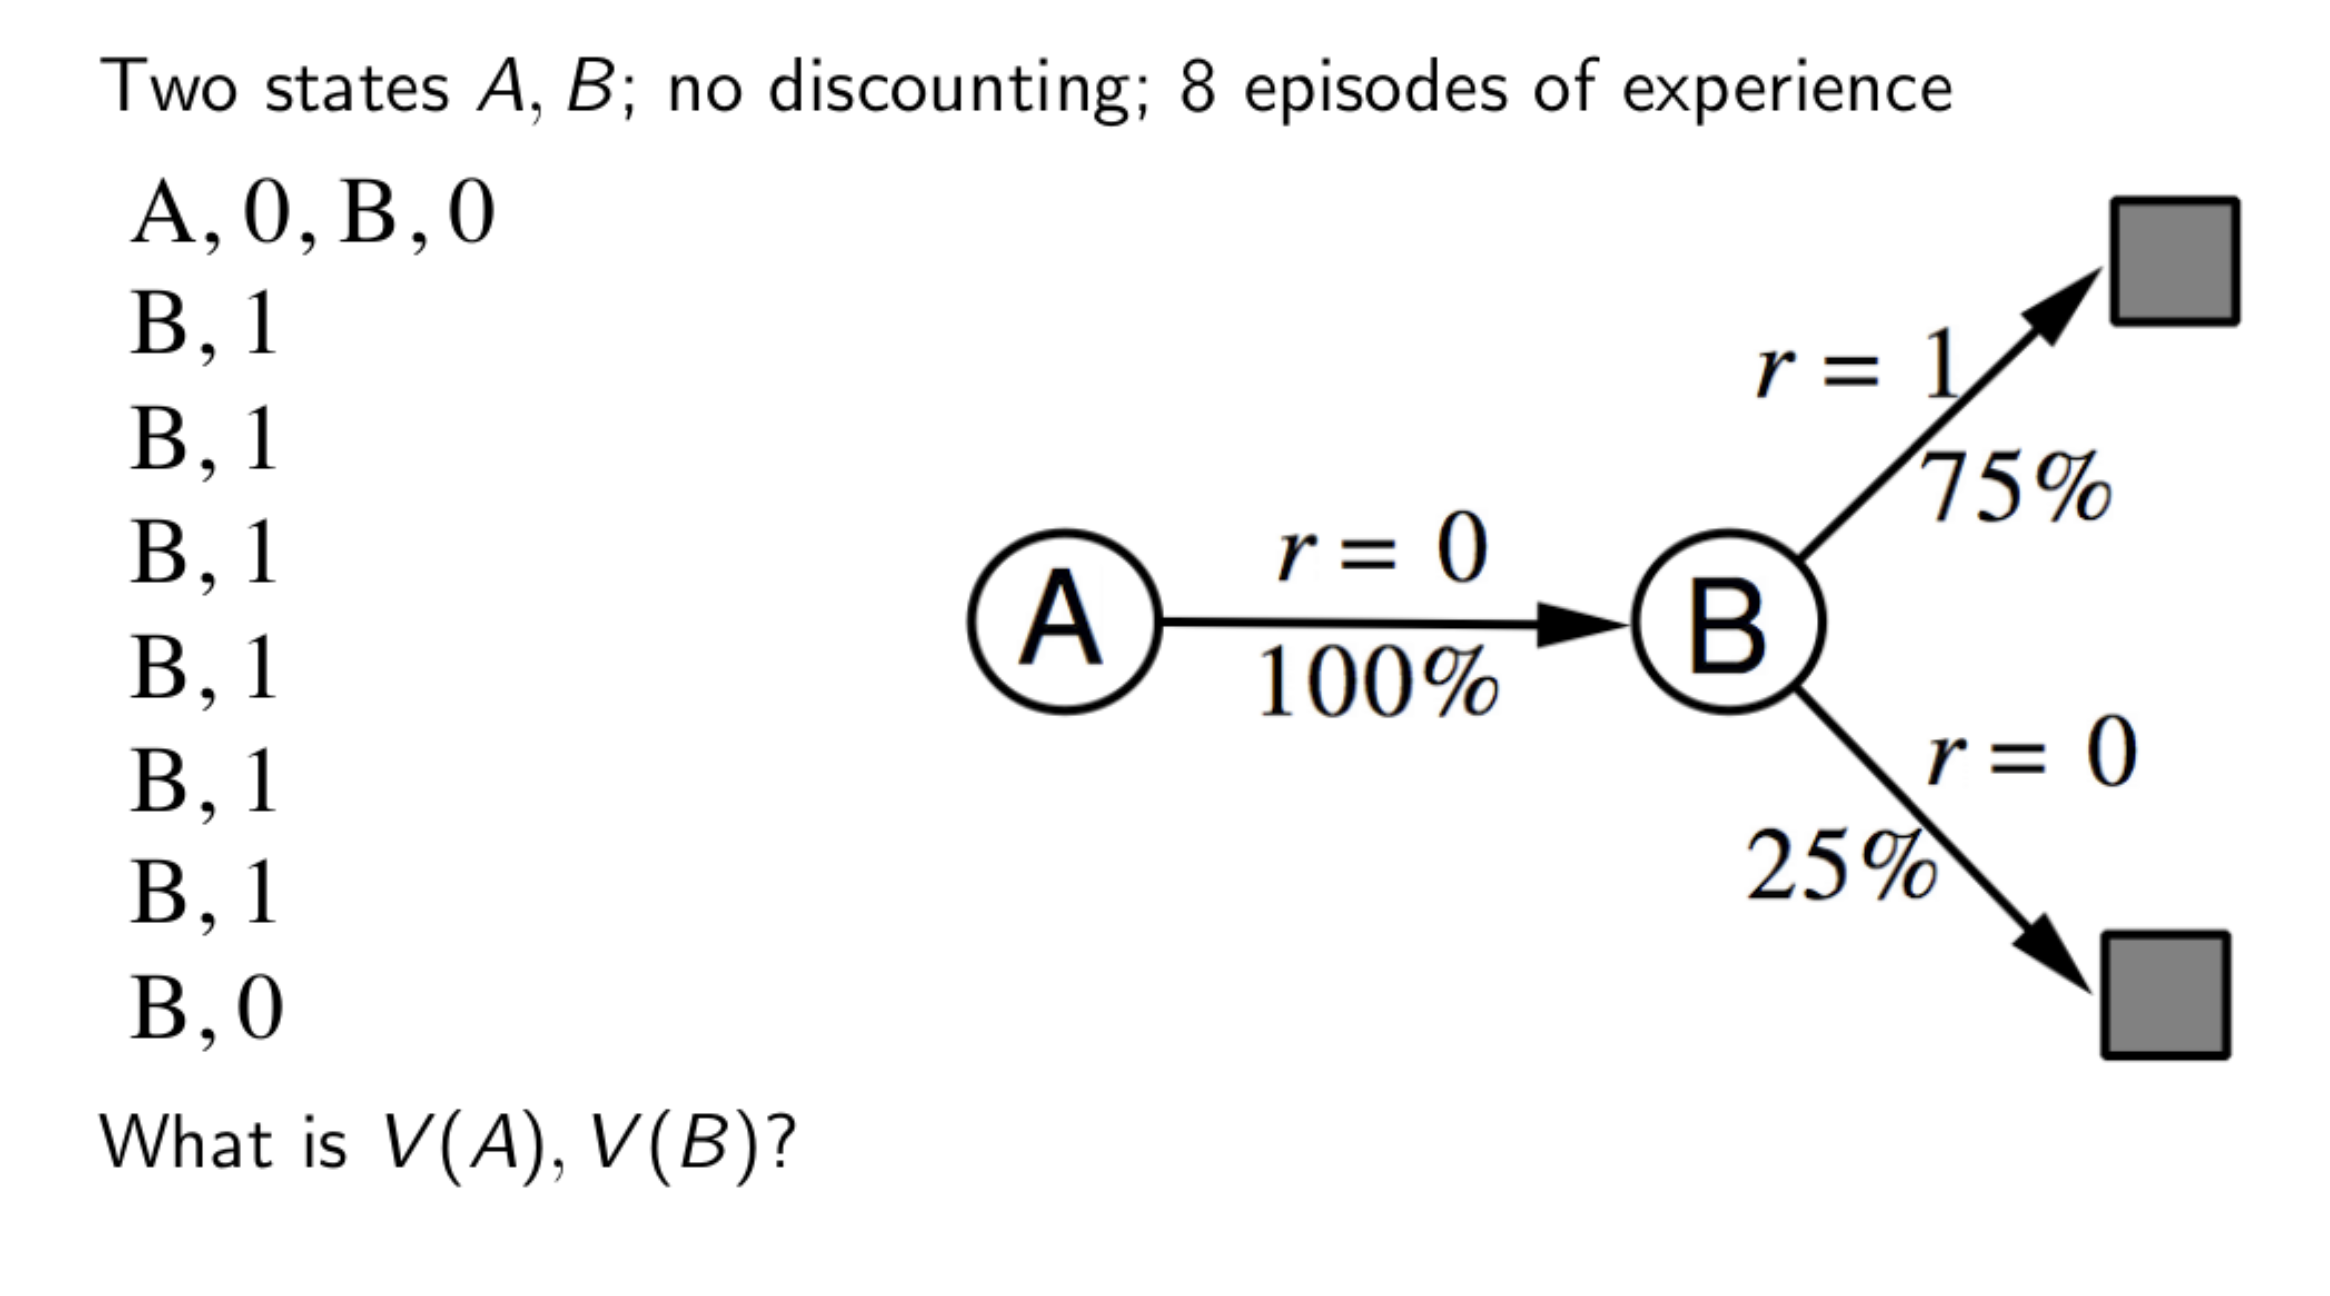

Чему будет равна функция $v(A)$ $v(B)$ при оценки Monte-Carlo и Temporal-Difference?

1. Monte-Carlo: $v(B)=\frac{6}{8}, v(A) = 0$
2. Temporal-Difference: $v(B) = \frac{6}{8}, v(A) = \frac{6}{8}$
Temporal-Difference подход учитывает то, что переход из $A$ в $B$ происходит с вероятностью 100% и поэтому $v(A)= v(B) = \frac{6}{8}$.

## SARSA

Взглянем внимательно на алгоритм TD: 
- Для каждого $k \in \overline{1, K}, K \gg 1$ выполняем: в соотвествии с выбранной политикой двигаемся по траектории $\tau = (S_0, A_0, S_1, A_1, \dotsc, S_T)$ получаем награду $R_\tau = (R_0, R_1, \dotsc, R_{T-1})$
- Для каждого $t \in \overline{0, T-1}$ обновляем функцию $Q(S, A)$: 
$$Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha\big(R_t + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \big)$$

Обратите внимание, что для обновления функции $Q(S_t, A_t)$ необходимо знание ее значения и функции награды на предыдущем и следующем шаге, т.е нет необходимости проходить ___всю___ траекторию для обновления функции $Q$.

__Алгоритм:__
1. Устанавливаем $Q(s, a)=0, K>0, \varepsilon=1$.
2. Для каждого $k \in \overline{1, K}$:
- двигаясь по текущей траектории из cоcтояния $S_t$ действуя $A_t$ в силу политики $\pi(\cdot|S_t)$, и обновляя политику $\pi = \varepsilon - greedy(Q)$ получаем $R_t$ и переходим в состояние $S_{t+1}$ c действием $A_{t+1} \sim \pi(\cdot|S_{t+1})$
- Обновляем $Q$: $Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha\big(R_t + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \big)$
- Обновляем $\varepsilon=\frac{1}{k}$

Алгорим называется SARSA по набору параметров, необходимых для обновления функции $Q$ на следующем шаге $(S_t, A_t, R_t, S_{t+1}, A_{t+1})$.

<div class="alert alert-block alert-info">
    <b>В отличии от алгоритма Monte-Carlo где траектория должна быть конечна в алгоритме SARSA траектория может быть бесконечна.</b>
</div>

## Q-learning

Для вывода алгоритма SARSA мы рассматривали уравнение Беллмана для $q$. Если рассмотреть его для $q_*$, проводя аналогичные рассуждения:
$$q_*(s, a) = \mathcal{R}(s, a) + \gamma \sum_{s'}\mathcal{P}(s'|s, a)\max_{a'}\pi(a'|s')q_*(s'|a')$$
$$\Downarrow$$
$$q_*(s, a)=\mathbb{E}_\pi[R_t + \gamma \max_{a'} q_*(S_{t+1}, a'|S_t=s, A_t=a)]$$
$$\Downarrow$$
$$Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha\big(R_t + \gamma \max_{a'} Q(S_{t+1}, a') - Q(S_t, A_t) \big)$$

Оно отличается только тем, что в нем стоит $\max$ вместо суммы по $a'$.

__Алгоритм:__
1. Устанавливаем $Q(s, a)=0, K>0, \varepsilon=1$.
2. Для каждого $k \in \overline{1, K}$:
- двигаясь по текущей траектории из cоcтояния $S_t$ действуя $A_t$ в силу политики $\pi(\cdot|S_t)$, и обновляя политику $\pi = \varepsilon - greedy(Q)$ получаем $R_t$ и переходим в состояние $S_{t+1}$ c действием $A_{t+1} \sim \pi(\cdot|S_{t+1})$
- Обновляем $Q$: $\displaystyle Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha\big(R_t + \gamma \max_{a'}Q(S_{t+1}, a') - Q(S_t, A_t) \big)$
- Обновляем $\varepsilon=\frac{1}{k}$

# Итоги:

Метод Monte-Carlo никак не использует метод динамического программирования, <br>
__SARSA__ является развитием метода __Q-Policy Iteration__, а __Q-learning__ развитием метода __Q-Value Iteration__

$$
\begin{array}{c|c}
  {\textbf{Q-Policy Iteration} \\ Q(s, a) \gets \mathbb{E}[R + \gamma Q(S', A')|s, a]} & {\textbf{SARSA} \\ Q(S, A) \stackrel{\alpha}{\leftarrow} R + \gamma Q(S', A') \\ } \\ 
  \hline
  {\textbf{Q-Value Iteration} \\ \displaystyle Q(s, a) \gets \mathbb{E}\big[ R + \gamma \max_{a' \in \mathcal{A}} Q(S', a'|s, a)\big]} & {\textbf{Q-learning} \\ \displaystyle Q(S, A) \stackrel{\alpha}{\leftarrow} R + \gamma \max_{a' \in \mathcal{A}} Q(S', a)}
\end{array}
$$